<a href="https://colab.research.google.com/github/bernardosnap/MVP---Sprint-Analise-de-Dados-e-Boas-Praticas/blob/main/An%C3%A1lise_de_Dados_Cidades_Brasileiras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP de Análise de Dados e Boas Práticas**

# Definição do Problema

**Clusterização de Cidades pelo Uso do Dinheiro Público**

A clusterização de cidades com base no uso do dinheiro público visa identificar padrões de alocação de recursos financeiros entre diferentes municípios brasileiros. O objetivo é agrupar cidades com perfis semelhantes em relação a despesas municipais, arrecadação de impostos e indicadores de desenvolvimento socioeconômico. Essa análise pode fornecer insights sobre como fatores econômicos, populacionais e de desenvolvimento humano influenciam a gestão dos recursos públicos. Utilizando técnicas de clusterização, espera-se encontrar grupos de cidades que compartilham características similares, permitindo a identificação de boas práticas ou de casos que demandam maior eficiência na gestão pública.

Para o problema em questão, algumas premissas e hipóteses são levantadas, dentre elas:

**Premissas:**

*  A arrecadação de impostos reflete a capacidade econômica de uma cidade e influencia diretamente suas despesas municipais.
*  Cidades com PIB mais alto tendem a gastar mais em serviços públicos, uma vez que dispõem de mais recursos para investir em infraestrutura e serviços.
*  O IDH está relacionado à eficiência na alocação dos recursos públicos, com cidades mais desenvolvidas apresentando um uso mais eficiente dos recursos.

**Hipóteses:**

*  Cidades que arrecadam mais impostos têm, em geral, maiores despesas municipais, o que pode refletir uma maior capacidade de investimento em serviços públicos.
*  Cidades com um alto PIB e alta população formarão clusters distintos em comparação com cidades menores, com disparidades claras em relação à alocação de recursos.
*  Cidades com IDH elevado estarão em clusters que mostram uma melhor eficiência no uso do dinheiro público, refletida por uma correlação positiva entre arrecadação de impostos, gastos e serviços públicos oferecidos





**Restrições e Condições para Seleção de Dados**

A fim de garantir uma qualidade e confiabilidade do modelo, algumas restrições e condições foram usadas para seleção dos dados:

*   **Qualidade dos dados:** os dados utilizados para treinar o modelo são precisos e consistentes.
*   **Diversidade do dataset:** o dataset inclui cidades de todos os estados brasileiros e com valores recentemente atualizados, garantindo que o modelo seja capaz de generalizar para novas situações.




**Importação de bibliotecas**

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from PIL import Image
from IPython.display import display
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

**Apresentação dos datasets**

In [2]:
cidades_brasileiras = 'https://raw.githubusercontent.com/bernardosnap/MVP---Sprint-Analise-de-Dados-e-Boas-Praticas/main/BRAZIL_CITIES_REV2022.CSV'
cidadesBR = pd.read_csv(cidades_brasileiras)

cidadesBR.sample(10)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
98,Alta Floresta D'Oeste,RO,0,24392,24392,0,7276,4306,2970,13804,...,2,38958866,245288714,2464,9268,1,0,0,0,1
4138,Ribeirão Claro,PR,0,10678,10674,4,3420,2365,1055,7034,...,2,18502309,283627484,3687,1986,0,0,0,0,2
2816,Madeiro,PI,0,7816,7816,0,1828,781,1047,3360,...,0,0,0,141,723,1,0,0,0,1
564,Beneditinos,PI,0,9911,9911,0,2774,1772,1002,6239,...,0,0,0,316,1768,0,0,0,0,1
4122,Riachão Do Dantas,SE,0,19386,19386,0,5044,1289,3755,4872,...,1,0,22286491,1045,1849,0,0,0,0,1
303,Araripina,PE,0,77302,77302,0,20644,13026,7618,44831,...,3,210122075,1200253755,6940,20919,0,0,0,0,6
5168,Telêmaco Borba,PR,0,69872,69827,45,21771,21317,454,68424,...,2,360424481,1069249224,26725,10138,115,0,0,0,1
1815,Francisco Sá,MG,0,24912,24912,0,6842,4211,2631,14810,...,2,24673973,182377669,2948,3027,0,0,0,0,4
2302,Itambaracá,PR,0,6759,6744,15,2170,1638,532,5050,...,0,0,0,2000,739,0,0,0,0,1
3514,Palmital,SP,0,21186,21177,9,7174,6594,580,19387,...,2,315998933,381736977,7936,2961,1,0,0,0,1


In [3]:
# Verifica o número de linhas e o tipo de cada coluna do dataframe
cidadesBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 81 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CITY                    5578 non-null   object 
 1   STATE                   5578 non-null   object 
 2   CAPITAL                 5578 non-null   int64  
 3   IBGE_RES_POP            5578 non-null   int64  
 4   IBGE_RES_POP_BRAS       5578 non-null   int64  
 5   IBGE_RES_POP_ESTR       5578 non-null   int64  
 6   IBGE_DU                 5578 non-null   int64  
 7   IBGE_DU_URBAN           5578 non-null   int64  
 8   IBGE_DU_RURAL           5578 non-null   int64  
 9   IBGE_POP                5578 non-null   int64  
 10  IBGE_1                  5578 non-null   int64  
 11  IBGE_1-4                5578 non-null   int64  
 12  IBGE_5-9                5578 non-null   int64  
 13  IBGE_10-14              5578 non-null   int64  
 14  IBGE_15-59              5578 non-null   

**COLUNAS DO DATAFRAME**

* **CITY** - Nome da Cidade
* **STATE** - Nome do Estado
* **CAPITAL** - 1 se for a Capital do Estado
* **IBGE_RES_POP** - População Residente - 2010
* **IBGE_RES_POP_BRAS** - População Residente Brasileira - 2010
* **IBGE_RES_POP_ESTR** - População Residente Estrangeira - 2010
* **IBGE_DU** - Unidades Domiciliares Totais - 2010
* **IBGE_DU_URBAN** - Unidades Domiciliares Urbanas - 2010
* **IBGE_DU_RURAL** - Unidades Domiciliares Rurais - 2010
* **IBGE_POP** - População Residente em Planejamento Urbano Regular - 2010
* **IBGE_1** - População Residente em Planejamento Urbano Regular - até 1 ano - 2010
* **IBGE_1-4** - População Residente em Planejamento Urbano Regular - de 1 a 4 anos - 2010
* **IBGE_5-9** - População Residente em Planejamento Urbano Regular - de 4 a 9 anos - 2010
* **IBGE_10-14** - População Residente em Planejamento Urbano Regular - de 10 a 14 anos - 2010
* **IBGE_15-59** - População Residente em Planejamento Urbano Regular - de 15 a 59 anos - 2010
* **IBGE_60+** - População Residente em Planejamento Urbano Regular - acima de 60 anos - 2010
* **IBGE_PLANTED_AREA** - Área Plantada (hectares) - 2017
* **IBGE_CROP_PRODUCTION** - Produção Agrícola - 2017 - 1.000 reais
* **IDHM Ranking** - Ranking do IDH - 2010
* **IDHM** - Índice de Desenvolvimento Humano - IDH - 2010
* **IDHM_Renda** - Índice de Desenvolvimento Humano - Renda - 2010
* **IDHM_Longevidade** - Índice de Desenvolvimento Humano - Longevidade - 2010
* **IDHM_Educacao** - Índice de Desenvolvimento Humano - Educação - 2010
* **LONG** - Longitude da Cidade - 2010
* **LAT** - Latitude da Cidade - 2010
* **ALT** - Altitude da Cidade (metros) - 2010 - 1 metro
* **PAY_TV** - Usuários de TV por Assinatura - 2019-03
* **FIXED_PHONES** - Usuários de Telefones Fixos (não celulares) - 2019-03
* **AREA** - Área da Cidade (quilômetros quadrados) - 2018 - 1 quilômetro quadrado (1 quilômetro = 1.000.000 metros quadrados)
* **REGIAO_TUR** - Categoria da Região Turística - 2017
* **CATEGORIA_TUR** - Categoria de Turismo - 2017
* **ESTIMATED_POP** - População Estimada - 2018-07
* **RURAL_URBAN** - Tipologia Rural ou Urbana - 2016
* **GVA_AGROPEC** - Valor Adicionado Bruto - Agropecuária - 2016 - 1.000 reais
* **GVA_INDUSTRY** - Valor Adicionado Bruto - Indústria - 2016 - 1.000 reais
* **GVA_SERVICES** - Valor Adicionado Bruto - Serviços - 2016 - 1.000 reais
* **GVA_PUBLIC** - Valor Adicionado Bruto - Serviços Públicos - 2016 - 1.000 reais
* **GVA_TOTAL** - Valor Adicionado Bruto Total - 2016 - 1.000 reais
* **TAXES** - Impostos - 2016 - 1.000 reais
* **GDP** - Produto Interno Bruto - 2016 - 1.000 reais
* **POP_GDP** - População - 2016
* **GDP_CAPITA** - Produto Interno Bruto per capita - 2016
* **GVA_MAIN** - Atividade com maior contribuição para o VAB - 2016
* **MUN_EXPENDIT** - Despesas Municipais - em reais - 2016 - 1 real
* **COMP_TOT** - Número total de empresas - 2016
* **COMP_A** - Número de Empresas: Agricultura, pecuária, silvicultura, pesca e aquicultura - 2016
* **COMP_B** - Número de Empresas: Indústrias extrativas - 2016
* **COMP_C** - Número de Empresas: Indústrias de transformação - 2016
* **COMP_D** - Número de Empresas: Eletricidade e gás - 2016
* **COMP_E** - Número de Empresas: Água, esgoto, gestão de resíduos e atividades de descontaminação - 2016
* **COMP_F** - Número de Empresas: Construção - 2016
* **COMP_G** - Número de Empresas: Comércio; reparação de veículos automotores e motocicletas - 2016
* **COMP_H** - Número de Empresas: Transporte, armazenagem e correio - 2016
* **COMP_I** - Número de Empresas: Alojamento e alimentação - 2016
* **COMP_J** - Número de Empresas: Informação e comunicação - 2016
* **COMP_K** - Número de Empresas: Atividades financeiras, de seguros e serviços relacionados - 2016
* **COMP_L** - Número de Empresas: Atividades imobiliárias - 2016
* **COMP_M** - Número de Empresas: Atividades profissionais, científicas e técnicas - 2016
* **COMP_N** - Número de Empresas: Atividades administrativas e serviços complementares - 2016
* **COMP_O** - Número de Empresas: Administração pública, defesa e seguridade social - 2016
* **COMP_P** - Número de Empresas: Educação - 2016
* **COMP_Q** - Número de Empresas: Saúde humana e serviços sociais - 2016
* **COMP_R** - Número de Empresas: Artes, cultura, esporte e recreação - 2016
* **COMP_S** - Número de Empresas: Outras atividades de serviços - 2016
* **COMP_T** - Número de Empresas: Serviços domésticos - 2016
* **COMP_U** - Número de Empresas: Instituições internacionais e outras instituições extraterritoriais - 2016
* **HOTELS** - Número total de hotéis - 2019-03
* **BEDS** - Número total de leitos em hotéis - 2019-03
* **Pr_Agencies** - Número total de agências bancárias privadas - 2019-02
* **Pu_Agencies** - Número total de agências bancárias públicas - 2019-02
* **Pr_Bank** - Número total de bancos privados - 2019-02
* **Pu_Bank** - Número total de bancos públicos - 2019-02
* **Pr_Assets** - Valor total dos ativos dos bancos privados - 2019-02 - 1 real
* **Pu_Assets** - Valor total dos ativos dos bancos públicos - 2019-02 - 1 real
* **Cars** - Número total de carros - 2019-01
* **Motorcycles** - Número total de motocicletas, scooters, ciclomotores - 2019-01
* **Wheeled_tractor** - Número total de tratores de rodas - 2019-01
* **UBER** - 1 se houver UBER - 2019-05
* **MAC** - Número total de lojas do McDonald's - 2018-11
* **WALLMART** - Número total de lojas do Walmart - 2018-12
* **POST_OFFICES** - Número total de agências dos correios - 2019-05




# Limpeza dos Dados

Primeiramente, a fim de facilitar a visualização, devemos verificar se e onde temos colunas em branco. Essas linhas serão analisadas uma a uma e terão 2 destinos possíveis:
- preenchidas com valores nulos ou com a média das valores, a depender da natureza da coluna e do cenário referente ao jogador.
- deletadas usando _dropna_

In [4]:
# Colunas vazias
colunas_com_nan = cidadesBR.isnull().any()

print(colunas_com_nan[colunas_com_nan])

Series([], dtype: bool)


Felizmente, o dataframe escolhido não apresenta colunas com valores em branco. Esse fato é muito bom, visto que, caso apresentasse a média dos valores poderia influenciar no resultado final da clusterização.



É difícil verificar tendências no formato em que está o dataframe. Para facilitar a visualização deveremos dropar algumas colunas que não são tidas como necessárias para a solução do problema proposto.

Apesar de não estarem diretamente ligadas aos gastos públicos, algumas colunas serão mantidas, tais como: cidade e estado, área, população residente e IDH.

Descarta-se então:
-  **geográficas e infraestrutura:** latitude, longitude, altitude e outros indicadores de infraestrutura como número de carros e agências bancárias não são diretamente relevantes para a análise do uso do dinheiro público.
-  **demografia detalhada e faixas etárias:** para simplificar a análise, as informações detalhadas de faixas etárias podem ser descartadas.
-  **empresas por setor:** o número de empresas por setor econômico pode ser mais detalhado do que necessário para uma análise de clusterização com foco em dinheiro público.
-  **produção agrícola e área plantada:** não estão diretamente relacionadas ao uso do dinheiro público, exceto em análises de setores econômicos específicos.
-  **turismo:** a categoria de turismo e região turística não estão diretamente ligadas ao uso do dinheiro público.

In [5]:
# Lista de colunas a dropar
drop_columns = [
    'LONG', 'LAT', 'ALT',
    'IBGE_1', 'IBGE_1-4', 'IBGE_5-9', 'IBGE_10-14',
    'IBGE_15-59', 'IBGE_60+', 'POP_GDP', 'ESTIMATED_POP',
    'COMP_TOT', 'COMP_A', 'COMP_B', 'COMP_C', 'COMP_D', 'COMP_E',
    'COMP_F', 'COMP_G', 'COMP_H', 'COMP_I', 'COMP_J', 'COMP_K',
    'COMP_L', 'COMP_M', 'COMP_N', 'COMP_O', 'COMP_P', 'COMP_Q',
    'COMP_R', 'COMP_S', 'COMP_T', 'COMP_U', 'GVA_MAIN',
    'PAY_TV', 'FIXED_PHONES', 'Pr_Agencies', 'Pu_Agencies',
    'Pr_Bank', 'Pu_Bank', 'Pr_Assets', 'Pu_Assets',
    'Cars', 'Motorcycles', 'Wheeled_tractor', 'POST_OFFICES', 'UBER',
    'MAC', 'WAL-MART',
    'REGIAO_TUR', 'CATEGORIA_TUR',
    'IBGE_PLANTED_AREA', 'IBGE_CROP_PRODUCTION_$', 'RURAL_URBAN', 'HOTELS', 'BEDS'
]

# Remover as colunas irrelevantes
cidadesBR = cidadesBR.drop(columns=drop_columns)

cidadesBR.sample(10)

,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,AREA,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,GDP_CAPITA,MUN_EXPENDIT
1591,Doutor Pedrinho,SC,0,3604,3597,7,1105,653,452,2019,...,374.205,7351,36191,23557,18594,85694,13054,98748,24749.0,13680118
3523,Pancas,ES,0,21548,21543,5,6521,3238,3283,10064,...,837.842,28573,9714,75404,89192,202883,10265,213148,9047.0,42987951
61,Alambari,SP,0,4884,4876,8,1526,1135,391,3671,...,159.600,29984,7031,23785,23097,83897,3387,87284,15427.0,0
1618,Elisiário,SP,0,3120,3117,3,994,910,84,2839,...,93.980,16210,5148,22026,16357,59740,2893,62634,17926.0,13210872
3079,Mojuí Dos Campos,PA,0,0,0,0,0,0,0,0,...,4988.236,42123,7198,28169,55645,133135,4178,137313,8832.0,0
663,Bom Progresso,RS,0,2328,2328,0,782,402,380,1146,...,88.741,20086,2085,15831,14532,52534,3145,55679,24879.0,12009865
586,Betânia Do Piauí,PI,0,6015,6015,0,1580,481,1099,1632,...,580.917,3881,1369,9943,25609,40803,2132,42934,7036.0,16103016
3895,Porto,PI,0,11897,11897,0,2784,1827,957,7475,...,253.210,4080,2999,15286,50631,72996,2499,75494,6126.0,0
235,Aparecida De Goiânia,GO,0,455657,455315,342,136583,136408,176,452266,...,278.539,10267,2468260,6057955,1783782,10320265,1660720,11980985,22515.0,0
780,Butiá,RS,0,20406,20385,21,6752,6388,364,19635,...,752.187,95797,58234,151099,89422,394552,25419,419971,19791.0,43677333


In [6]:
cidadesBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               5578 non-null   object 
 1   STATE              5578 non-null   object 
 2   CAPITAL            5578 non-null   int64  
 3   IBGE_RES_POP       5578 non-null   int64  
 4   IBGE_RES_POP_BRAS  5578 non-null   int64  
 5   IBGE_RES_POP_ESTR  5578 non-null   int64  
 6   IBGE_DU            5578 non-null   int64  
 7   IBGE_DU_URBAN      5578 non-null   int64  
 8   IBGE_DU_RURAL      5578 non-null   int64  
 9   IBGE_POP           5578 non-null   int64  
 10  IDHM Ranking 2010  5578 non-null   int64  
 11  IDHM               5578 non-null   float64
 12  IDHM_Renda         5578 non-null   float64
 13  IDHM_Longevidade   5578 non-null   float64
 14  IDHM_Educacao      5578 non-null   float64
 15  AREA               5578 non-null   float64
 16  GVA_AGROPEC        5578 

A fim de obter um resumo estatístico básico do dataframe, utilizamos o método describe(). Ele é uma ferramenta essencial na análise exploratória, visto que oferece informações valiosas sobre a distribuição de dados. As métricas fornecidas pelo mesmo serão essenciais para identificar elementos como tendências, outliers, dispersões e valores ausentes.

In [7]:
cidadesBR.describe()

,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IDHM Ranking 2010,IDHM,...,AREA,GVA_AGROPEC,GVA_INDUSTRY,GVA_SERVICES,GVA_PUBLIC,GVA_TOTAL,TAXES,GDP,GDP_CAPITA,MUN_EXPENDIT
count,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03,5578.000000,5578.000000,...,5578.000000,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5.578000e+03,5578.000000,5.578000e+03
mean,0.005916,3.422313e+04,3.414573e+04,77.404625,1.028313e+04,8.842319e+03,1440.807458,2.755270e+04,2777.296701,0.658013,...,1526.082637,5.500059e+04,2.063104e+05,5.410926e+05,1.695651e+05,9.719687e+05,1.523629e+05,1.124332e+06,21110.827895,7.631430e+07
std,0.076695,2.028829e+05,2.012627e+05,1793.789719,6.469199e+04,6.428575e+04,1690.483808,1.857468e+05,1609.523913,0.077159,...,5603.990697,9.202055e+04,1.296665e+06,7.133989e+06,1.558102e+06,9.411596e+06,1.964351e+06,1.135221e+07,20328.564075,7.409350e+08
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.415900e+04,0.000000e+00,0.000000,0.000000e+00
25%,0.000000,5.217000e+03,5.214000e+03,0.000000,1.565250e+03,8.700000e+02,469.250000,2.784250e+03,1384.250000,0.599000,...,204.353750,1.061550e+04,3.645000e+03,1.784675e+04,2.449750e+04,7.284400e+04,2.949750e+03,7.595700e+04,9048.500000,0.000000e+00
50%,0.000000,1.092650e+04,1.091600e+04,0.000000,3.167000e+03,1.839500e+03,916.000000,6.156000e+03,2776.500000,0.665000,...,416.591000,2.702800e+04,1.170150e+04,4.662300e+04,4.724250e+04,1.589490e+05,8.660000e+03,1.682985e+05,15865.000000,1.773320e+07
75%,0.000000,2.340900e+04,2.338000e+04,10.000000,6.722500e+03,4.618750e+03,1811.750000,1.529875e+04,4170.750000,0.718000,...,1026.571500,6.137700e+04,6.349575e+04,1.470768e+05,9.973950e+04,4.132338e+05,3.212525e+04,4.456062e+05,26154.750000,4.145595e+07
max,1.000000,1.125350e+07,1.113378e+07,119727.000000,3.576148e+06,3.548433e+06,33809.000000,1.046364e+07,5565.000000,0.862000,...,159533.328000,1.402282e+06,6.330676e+07,4.646570e+08,9.205145e+07,5.699105e+08,1.171254e+08,6.870359e+08,314638.000000,4.577250e+10


Além disso, faremos uma outra descrição dos dados, explicitando os valores mínimos e máximos esperados para dados numéricos, exceto a coluna referente a capital, por ser binária.

In [8]:
# Ajusta o Pandas para exibir todas as colunas e quebra as linhas automaticamente
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)

# Seleciona apenas as colunas numéricas (float e int)
numerical_cols = cidadesBR.select_dtypes(include=['float64', 'int64']).drop(columns=['CAPITAL'])

# Inicializa um dicionário para armazenar os valores mínimos, máximos e a cidade-estado correspondente
min_max_dict = {}

# Preenche o dicionário com as colunas alternadas de min e max, e adiciona CITY-STATE
for col in numerical_cols.columns:
    # Valor mínimo e sua cidade-estado
    min_value = numerical_cols[col].min()
    min_city_state = cidadesBR.loc[cidadesBR[col] == min_value, ['CITY', 'STATE']].iloc[0]
    min_city_state_str = f"{min_city_state['CITY']} - {min_city_state['STATE']}"

    # Valor máximo e sua cidade-estado
    max_value = numerical_cols[col].max()
    max_city_state = cidadesBR.loc[cidadesBR[col] == max_value, ['CITY', 'STATE']].iloc[0]
    max_city_state_str = f"{max_city_state['CITY']} - {max_city_state['STATE']}"

    # Adiciona os valores e suas cidades-estados ao dicionário
    min_max_dict[f'min_{col}'] = [min_value, min_city_state_str]
    min_max_dict[f'max_{col}'] = [max_value, max_city_state_str]

# Cria o DataFrame a partir do dicionário
min_max_df = pd.DataFrame(min_max_dict)

# Exibe o DataFrame completo
min_max_df

,min_IBGE_RES_POP,max_IBGE_RES_POP,min_IBGE_RES_POP_BRAS,max_IBGE_RES_POP_BRAS,min_IBGE_RES_POP_ESTR,max_IBGE_RES_POP_ESTR,min_IBGE_DU,max_IBGE_DU,min_IBGE_DU_URBAN,max_IBGE_DU_URBAN,min_IBGE_DU_RURAL,max_IBGE_DU_RURAL,min_IBGE_POP,max_IBGE_POP,min_IDHM Ranking 2010,max_IDHM Ranking 2010,min_IDHM,max_IDHM,min_IDHM_Renda,max_IDHM_Renda,min_IDHM_Longevidade,max_IDHM_Longevidade,min_IDHM_Educacao,max_IDHM_Educacao,min_AREA,max_AREA,min_GVA_AGROPEC,max_GVA_AGROPEC,min_GVA_INDUSTRY,max_GVA_INDUSTRY,min_GVA_SERVICES,max_GVA_SERVICES,min_GVA_PUBLIC,max_GVA_PUBLIC,min_GVA_TOTAL,max_GVA_TOTAL,min_TAXES,max_TAXES,min_GDP,max_GDP,min_GDP_CAPITA,max_GDP_CAPITA,min_MUN_EXPENDIT,max_MUN_EXPENDIT
0,0,11253503,0,11133776,0,119727,0,3576148,0,3548433,0,33809,0,10463636,0,5565,0.0,0.862,0.0,0.891,0.0,0.894,0.0,0.825,0.0,159533.328,0,1402282,0,63306755,0,464656988,0,92051448,0,569910503,-14159,117125387,0,687035890,0.0,314638.0,0,45772497944
1,Balneário Rincão - SC,São Paulo - SP,Balneário Rincão - SC,São Paulo - SP,Abadia De Goiás - GO,São Paulo - SP,Balneário Rincão - SC,São Paulo - SP,Balneário Rincão - SC,São Paulo - SP,Alvorada - RS,São José De Ribamar - MA,Balneário Rincão - SC,São Paulo - SP,Balneário Rincão - SC,Melgaço - PA,Balneário Rincão - SC,São Caetano Do Sul - SP,Balneário Rincão - SC,São Caetano Do Sul - SP,Balneário Rincão - SC,Balneário Camboriú - SC,Balneário Rincão - SC,Águas De São Pedro - SP,Santa Teresinha - BA,Altamira - PA,Lagoa Dos Patos - RS,Sapezal - MT,Lagoa Dos Patos - RS,São Paulo - SP,Lagoa Dos Patos - RS,São Paulo - SP,Lagoa Dos Patos - RS,Brasília - DF,Lagoa Dos Patos - RS,São Paulo - SP,Varre-Sai - RJ,São Paulo - SP,Lagoa Dos Patos - RS,São Paulo - SP,Lagoa Dos Patos - RS,Paulínia - SP,Abaetetuba - PA,São Paulo - SP


-  A menor população residente (min_IBGE_RES_POP) foi em Balneário Rincão, SC, enquanto a maior população residente foi em São Paulo, SP.

-  A cidade com a menor área (min_AREA) é Santa Teresinha, BA, e a maior área foi encontrada em Altamira, PA.

-  O menor valor de PIB per capita (min_GDP_CAPITA) foi em Varre-Sai, RJ, e o maior valor em Paulínia, SP.

-  O menor IDH (min_IDHM) foi em Melgaço, PA, e o maior em São Caetano do Sul, SP, o que reflete as disparidades no desenvolvimento entre municípios do Brasil.

-  A tabela ilustra a distribuição desigual de recursos, desenvolvimento humano e população entre diferentes regiões do Brasil.

-  São Paulo, tanto como estado quanto capital, se destaca com vários valores máximos em termos de população e riqueza (PIB).

-  Pequenos municípios, como Balneário Rincão e Lagoa Dos Patos, aparecem frequentemente com os valores mínimos em várias categorias.

# Visualização de Dados

- **Gráficos**

A fim de entender como está a relação entre algumas variáveis, plotamos 2 gráficos.

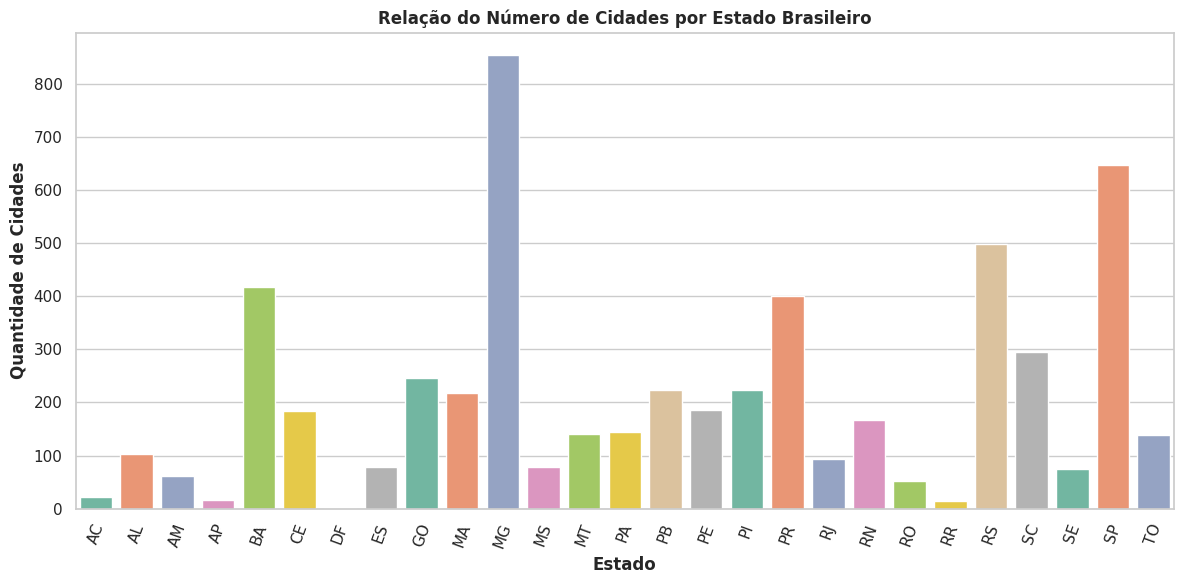

In [9]:
# Configurar o estilo do gráfico
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Agrupando as cidades por estado e contando quantas cidades existem em cada um
city_count_by_state = cidadesBR.groupby('STATE')['CITY'].count().reset_index()

# Renomeando a coluna para 'City_Count'
city_count_by_state.rename(columns={'CITY': 'City_Count'}, inplace=True)

# Configurar o estilo do gráfico
sns.set(style="whitegrid")
palette = sns.color_palette("Set2")

# Criar gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE', y='City_Count', data=city_count_by_state, palette=palette, width=0.8)

plt.title('Relação do Número de Cidades por Estado Brasileiro', fontweight='bold')
plt.ylabel('Quantidade de Cidades', fontweight='bold')
plt.xlabel('Estado', fontweight='bold')

plt.xticks(rotation=70)  # Rotacionar os rótulos para melhor visualização
plt.tight_layout()
plt.show()

Vemos também, que o dataframe está minimamente bem distribuído em relação ao número de cidades por estado, o que comprova a qualidade e diversidade dos dados. Estados do Sudeste e Nordeste tendem a ter mais municípios, enquanto estados do Norte possuem menos cidades. Alguns estados como **Roraima, Amapá e Acre**, têm uma quantidade muito menor de cidades, com menos de 30 municípios. Por outro lado, **Minas Gerais, São Paulo e Bahia**, possuem uma grande quantidade de cidades, com mais de 800, 600 e 400, respectivamente.

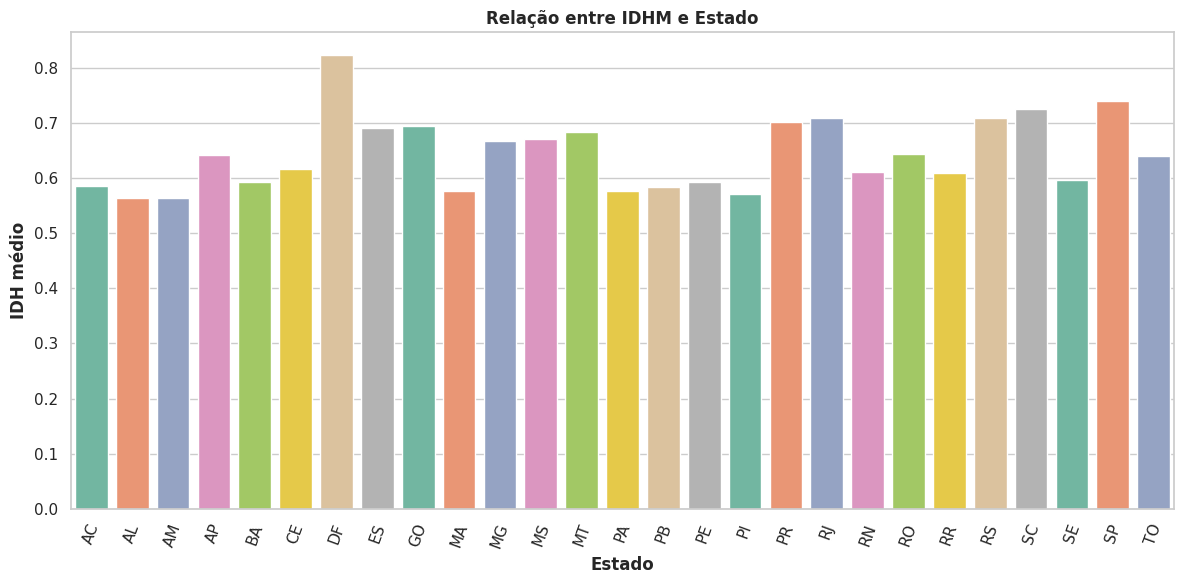

In [10]:
# Ordenar o DataFrame 'cidadesBR' por estado em ordem alfabética
cidadesBR_sorted = cidadesBR.sort_values('STATE')

# 1) Gráfico de barras da relação entre IDHM e STATE
plt.figure(figsize=(12, 6))
sns.barplot(x='STATE', y='IDHM', data=cidadesBR_sorted, palette=palette, ci=None, width=0.8)

# Adicionar os rótulos e título
plt.xlabel('Estado', fontweight='bold')
plt.ylabel('IDH médio', fontweight='bold')
plt.title('Relação entre IDHM e Estado', fontweight='bold')

plt.xticks(rotation=70)  # Rotacionar os rótulos para melhor visualização
plt.tight_layout()
plt.show()

Algumas observações importantes merecem ser destacadas no gráfico acima. O **Distrito Federal** se destaca como o maior IDH, seguido dos estados de **São Paulo, Rio de Janeiro, Santa Catarina e Paraná**. Por outro lado, os etados de **Alagoas, Maranhão e Piauí** se destacam negativamente. Os estados do Sul e Sudeste tendem a apresentar maiores IDHs, indicando melhores condições de vida e acesso a serviços, diferentemente de Nordeste e Norte, sugerindo um desenvolvimento humano mais desigual no Brasil.

Apesar de já termos um problema definido previamente, é de bom grado analisarmos a distribuição dos dados, a fim de checar se todos estão distribuídos conforme o esperado.

- **Histograma**




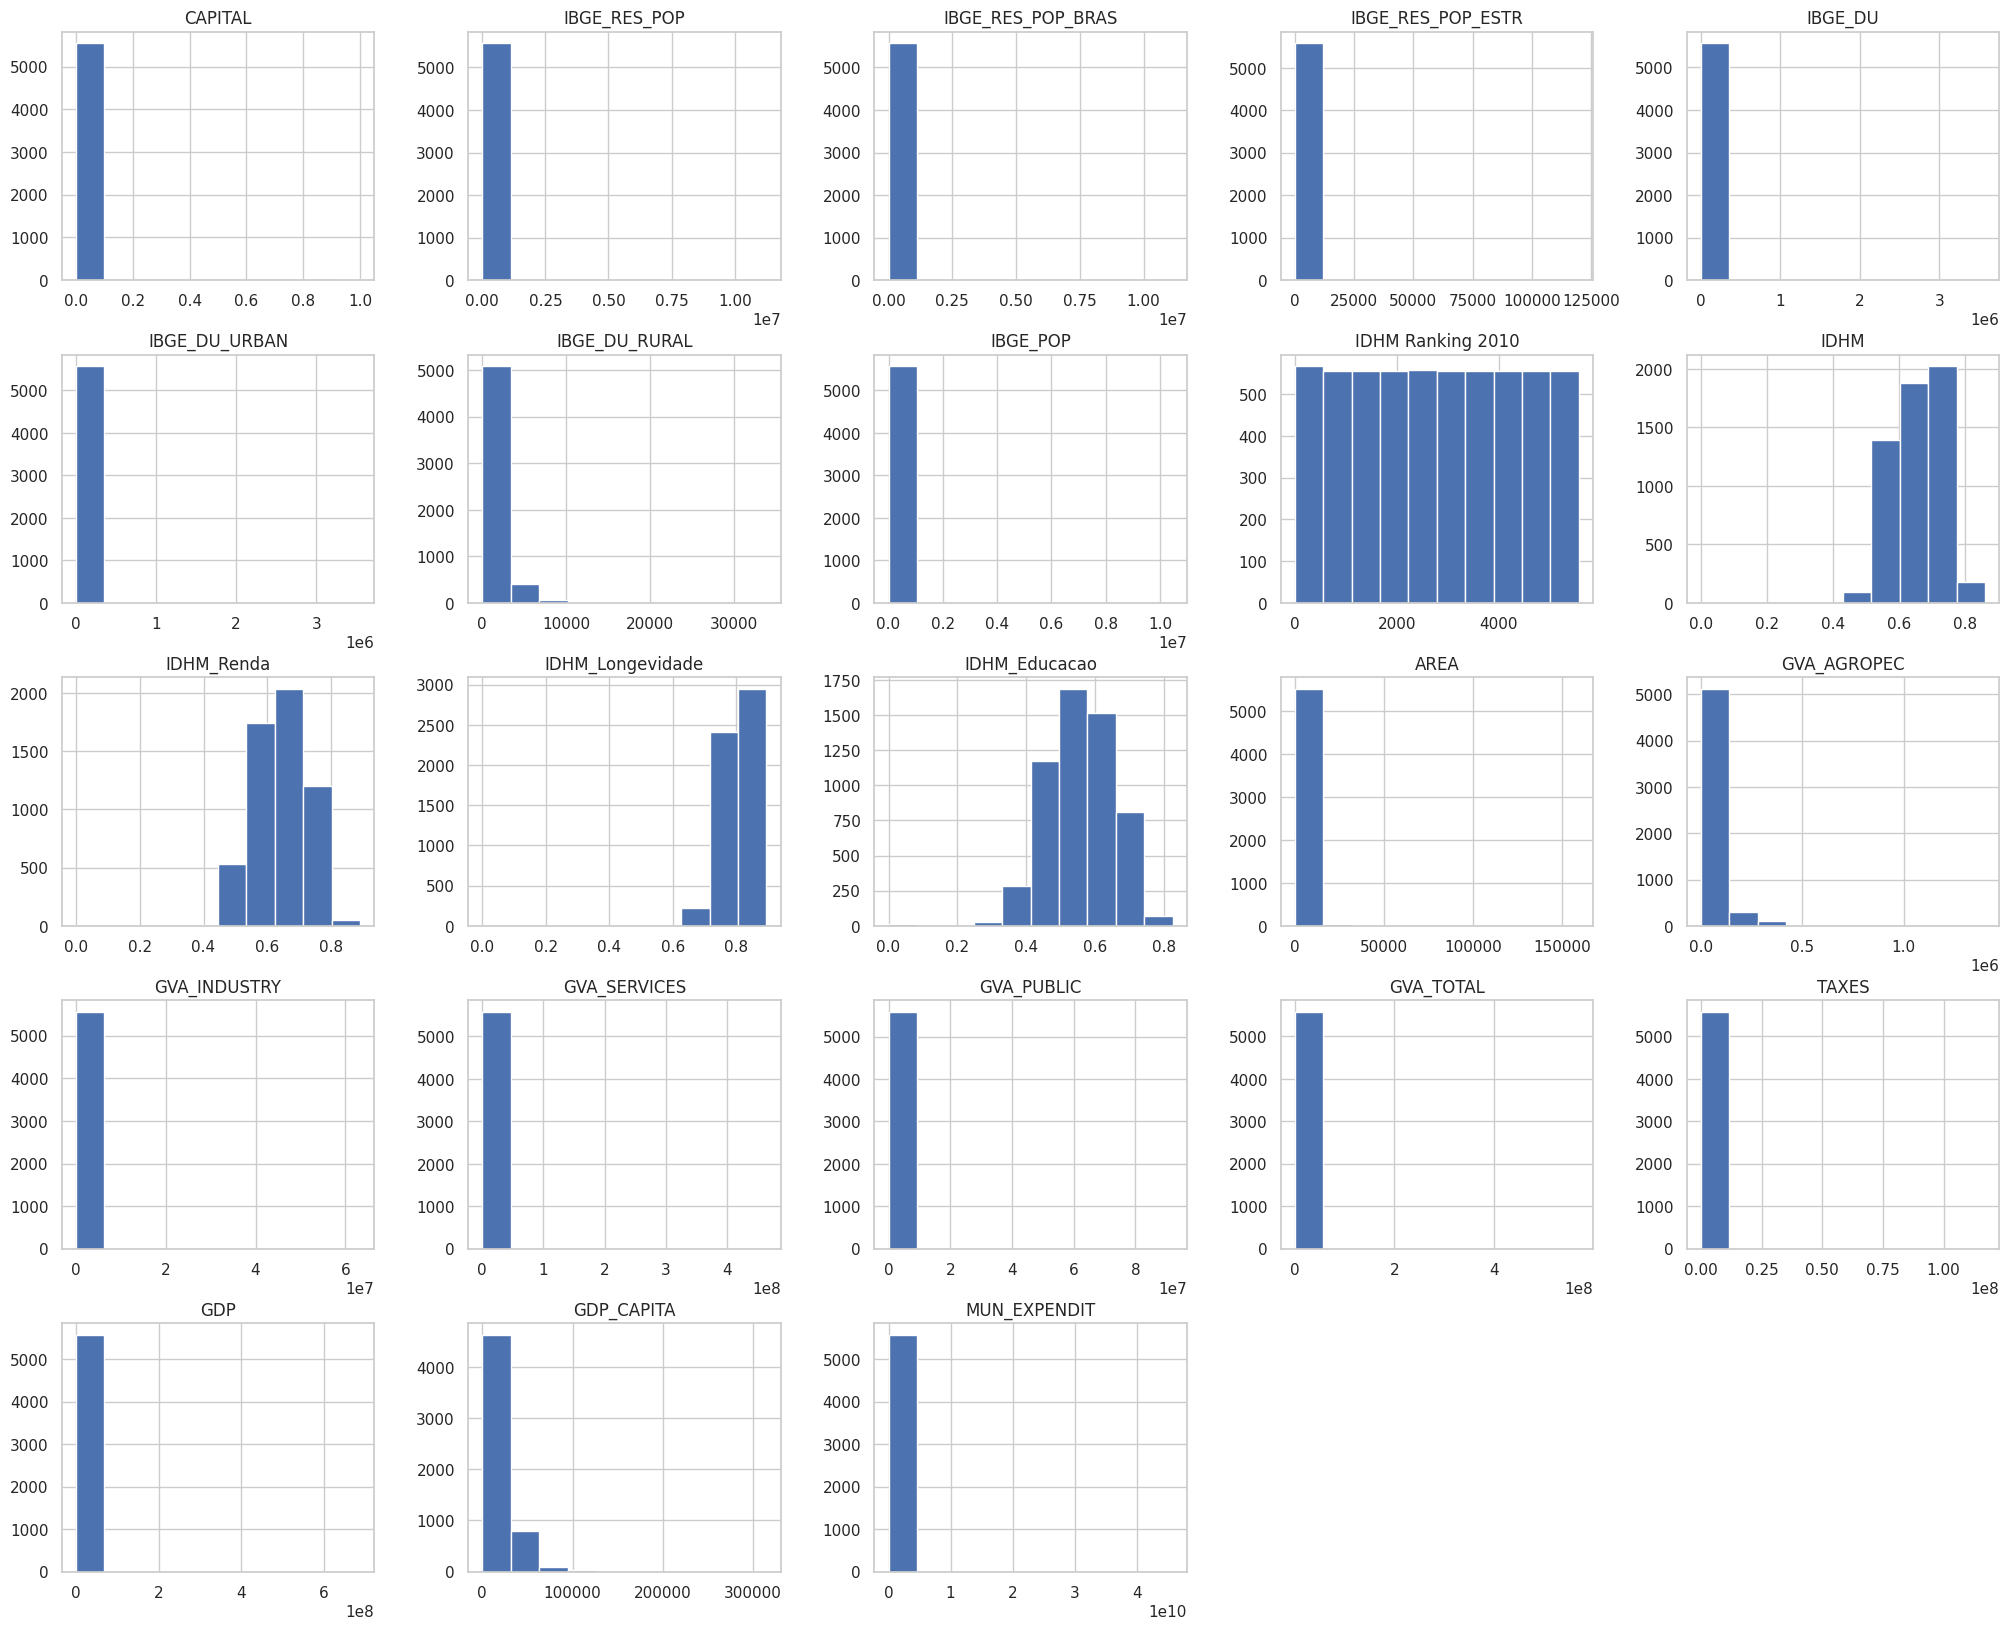

In [11]:
cidadesBR.hist(figsize = (25,20))
plt.show()

Analisando o histograma, observamos algumas coisas, tais como:

- **CAPITAL:** essa variável é binária, com a maioria dos municípios não sendo capitais (valor 0), e um número pequeno sendo capitais (valor 1).

- **IBGE_RES_POP, IBGE_RES_POP_BRAS, IBGE_RES_POP_ESTR:** a maioria dos municípios tem populações residentes relativamente pequenas, mas há alguns municípios com populações muito grandes, possivelmente capitais ou grandes centros urbanos.

- **IBGE_DU:** distribuição de domicílios urbanos, onde a maior parte dos municípios apresenta números relativamente baixos, mas com algumas cidades com valores bem maiores.

- **IBGE_DU_URBAN e IBGE_DU_RURAL:** mostra uma concentração maior de domicílios urbanos em relação a rurais, refletindo o padrão de urbanização brasileiro. Poucos municípios têm um número significativo de domicílios rurais.

- **IBGE_POP:** População total parece estar concentrada em valores baixos, mas há alguns municípios com populações muito grandes.

- **IDHM Ranking 2010:** Há uma distribuição relativamente uniforme, indicando que os municípios estão espalhados por uma ampla gama de rankings de IDHM.

- **IDHM, IDHM_Renda, IDHM_Longevidade, IDHM_Educacao:** A maioria dos municípios tem valores médios a altos de IDH, com alguns poucos na faixa mais baixa. O IDH de Longevidade e Educação parece concentrar-se mais nas faixas superiores.

- **AREA:** A maioria dos municípios tem áreas relativamente pequenas, mas há alguns municípios com áreas muito extensas.

- **GVA_AGROPEC:** A maioria dos municípios tem baixa contribuição da agropecuária no Valor Adicionado Bruto (GVA), com alguns apresentando valores maiores.

- **GVA_INDUSTRY, GVA_SERVICES, GVA_PUBLIC, GVA_TOTAL:** A contribuição da indústria, serviços e setor público ao GVA também parece ser baixa para a maioria dos municípios, com exceções em algumas cidades.

- **TAXES:** A arrecadação de impostos também está concentrada em valores baixos, com poucos municípios apresentando valores muito maiores.

- **GDP e GDP_CAPITA:** O PIB geral dos municípios segue uma distribuição bastante assimétrica, com a maioria dos municípios tendo PIBs relativamente baixos. O PIB per capita também é assimétrico, mas parece haver alguns municípios com valores muito altos.

- **MUN_EXPENDIT:** A despesa municipal está concentrada em valores baixos, mas há alguns municípios com despesas públicas extremamente altas.


Portanto, de maneira resumida, temos algumas observações gerais:

- **Assimetria e outliers:** vários histogramas mostram uma distribuição assimétrica, com a maioria dos valores concentrados em uma faixa inferior e alguns outliers (valores muito altos) que podem corresponder a grandes centros urbanos ou capitais.

- **Distribuição de renda e desenvolvimento:** o IDH mostra uma tendência de concentração em níveis médios e altos, o que pode indicar uma boa qualidade de vida em muitos municípios, embora existam exceções.

- **Despesas municipais e PIB:** as despesas e o PIB estão fortemente concentrados em níveis baixos, com uma pequena quantidade de municípios concentrando grande parte da atividade econômica e dos gastos públicos.



- **Gráfico de Densidade**

Outra maneira de se fazer a visualização da distribuição dos dados é usando o gráfico de densidade. Ele é muito utilizado por mostrar de forma mais suave a distribuição das variávies. Enquanto o histograma divide os dados em intervalos discretos, o gráfico de densidade estima a função de densidade de probabilidade, oferecendo uma representação contínua dos dados, permitindo, assim, identificar padrões de forma mais refinada, com múltiplos picos e variações subtis, que podem ser difíceis de perceber em um histograma. Além disso, o gráfico de densidade é util para comparar distribuições de diferentes conjuntos de dados, pois ele não depende do tamanho dos intervalos.

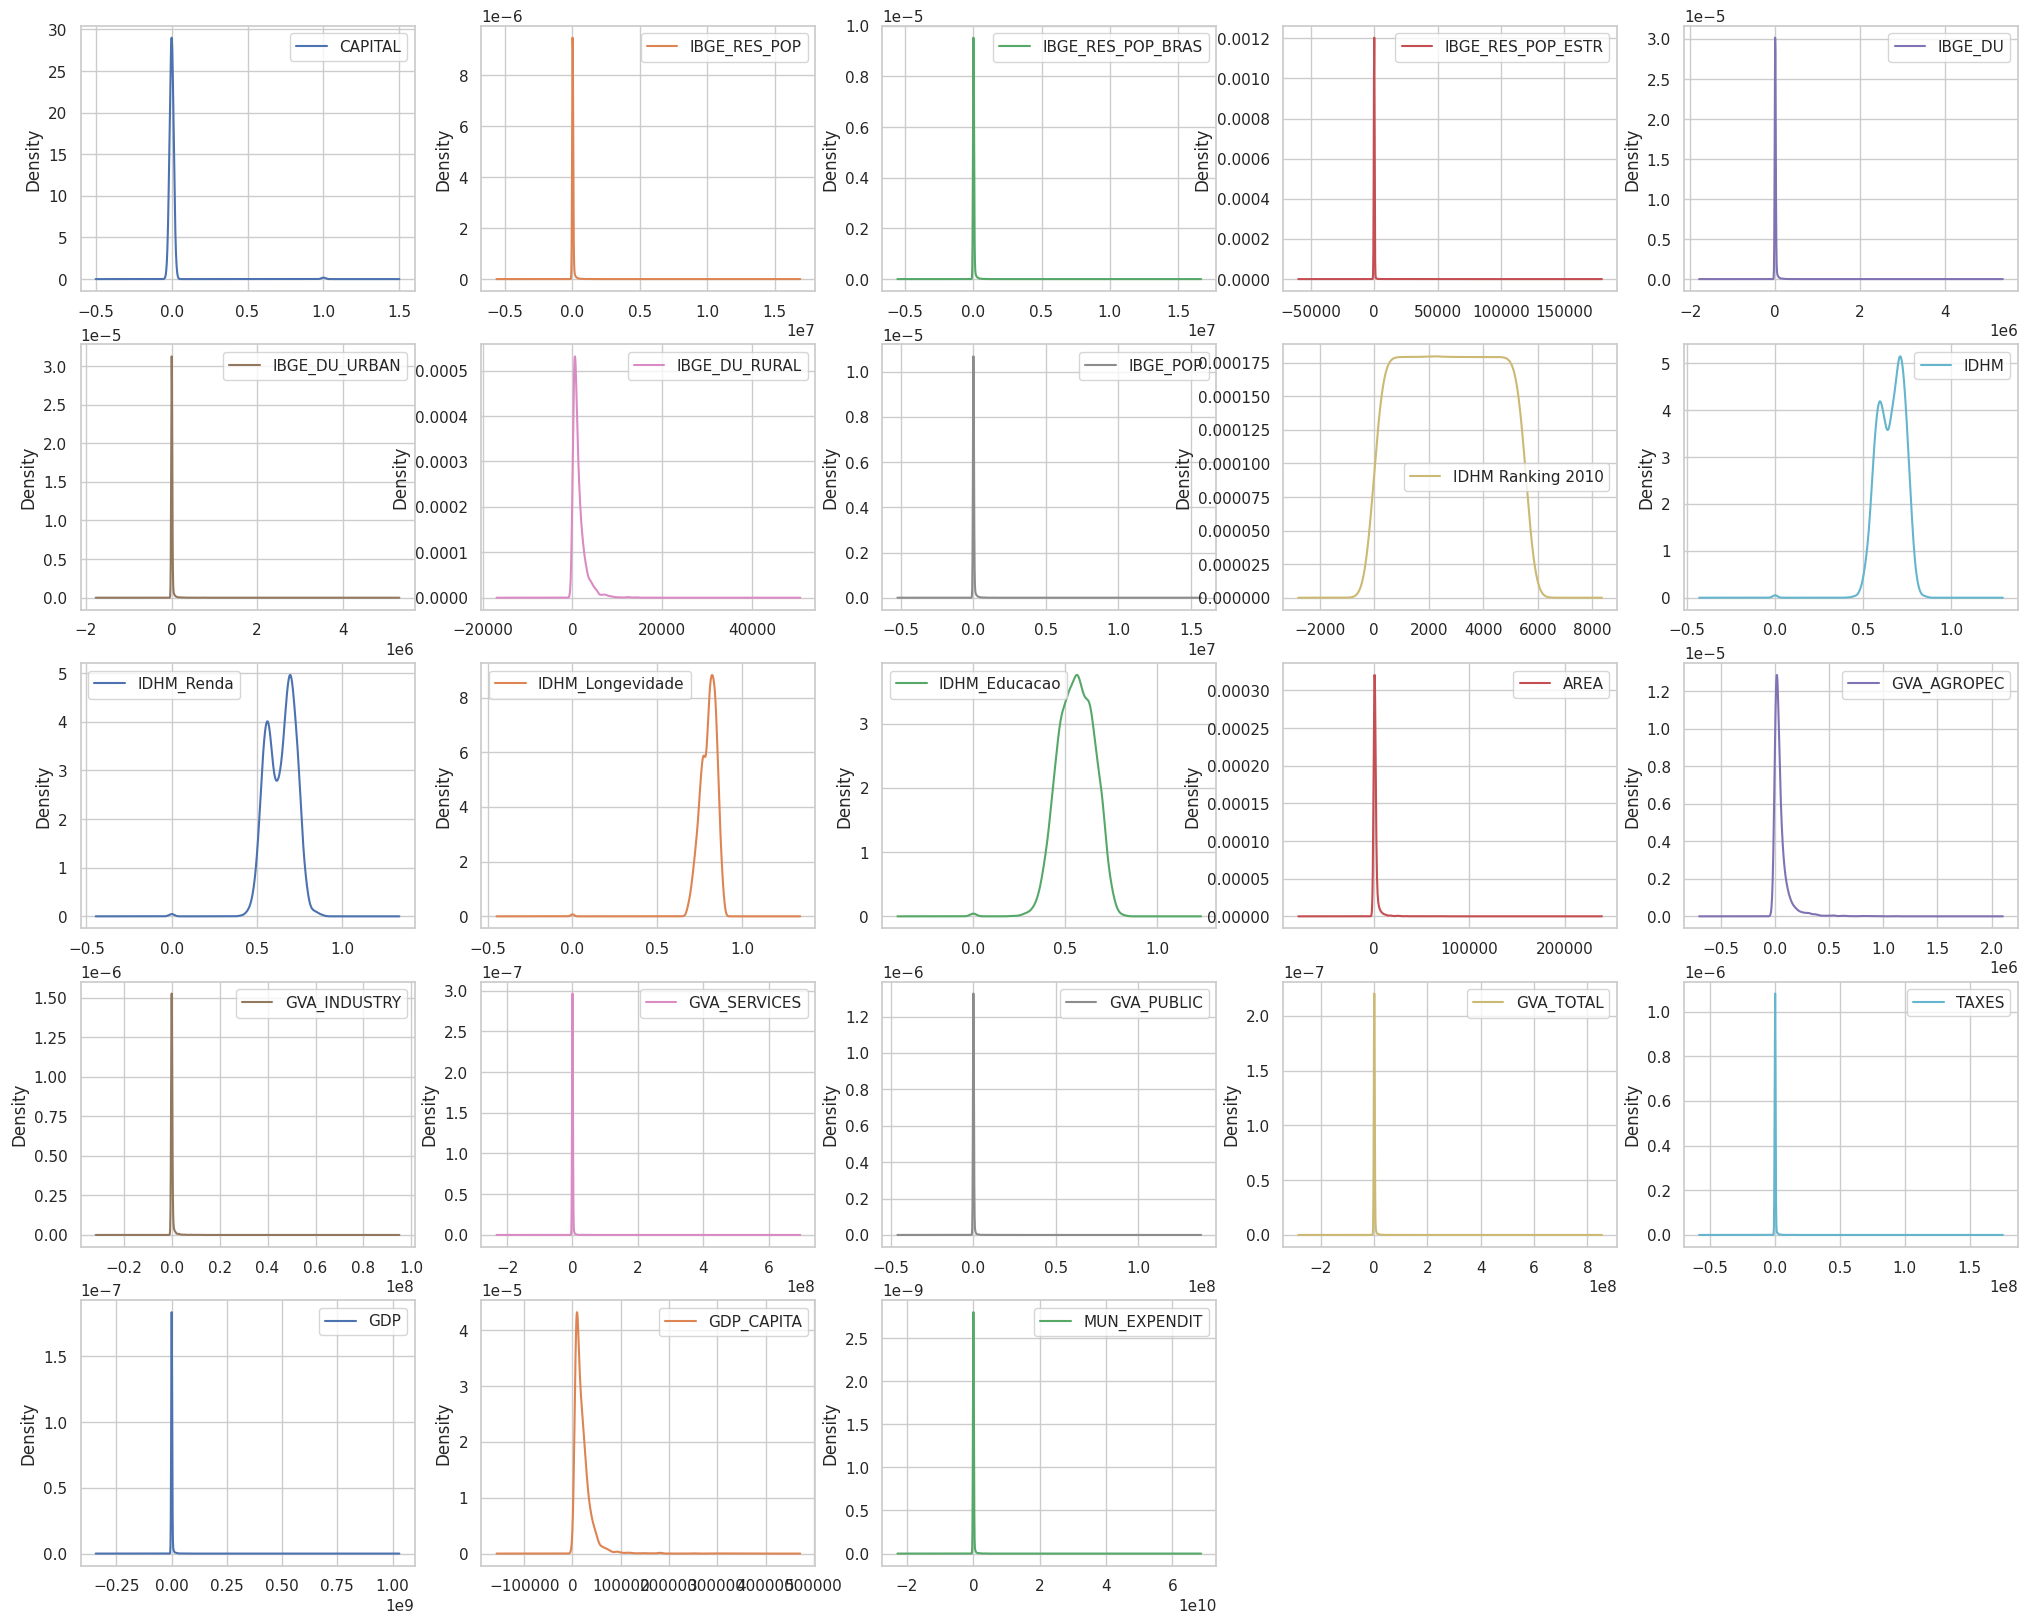

In [12]:
cidadesBR.plot(kind = 'density', subplots = True, layout = (5,5), sharex = False, figsize = (25,20))
plt.show()

Analisando os gráficos, temos alguns insights:

- muitas das variáveis econômicas e demográficas (como PIB, VAB por setor e população) estão fortemente enviesadas, o que significa que a maioria das cidades é pequena ou tem menor atividade econômica, enquanto algumas poucas dominam em termos de tamanho, produção econômica e população.

- as variáveis relacionadas ao IDHM (IDH e seus componentes: renda, educação e longevidade) mostram mais variação e tendem a se concentrar em valores mais altos, indicando melhores indicadores de desenvolvimento humano para a maioria das cidades.

- há variabilidade clara na forma como as cidades contribuem para diferentes setores (agricultura, indústria, serviços), mas esses setores mostram grandes disparidades, com muitas cidades contribuindo pouco e algumas contribuindo significativamente.

- **Boxplot**

Além disso, temos os chamados boxplots. Eles são úteis para identificar a dispersão, assimetrias e a presença de outliers.

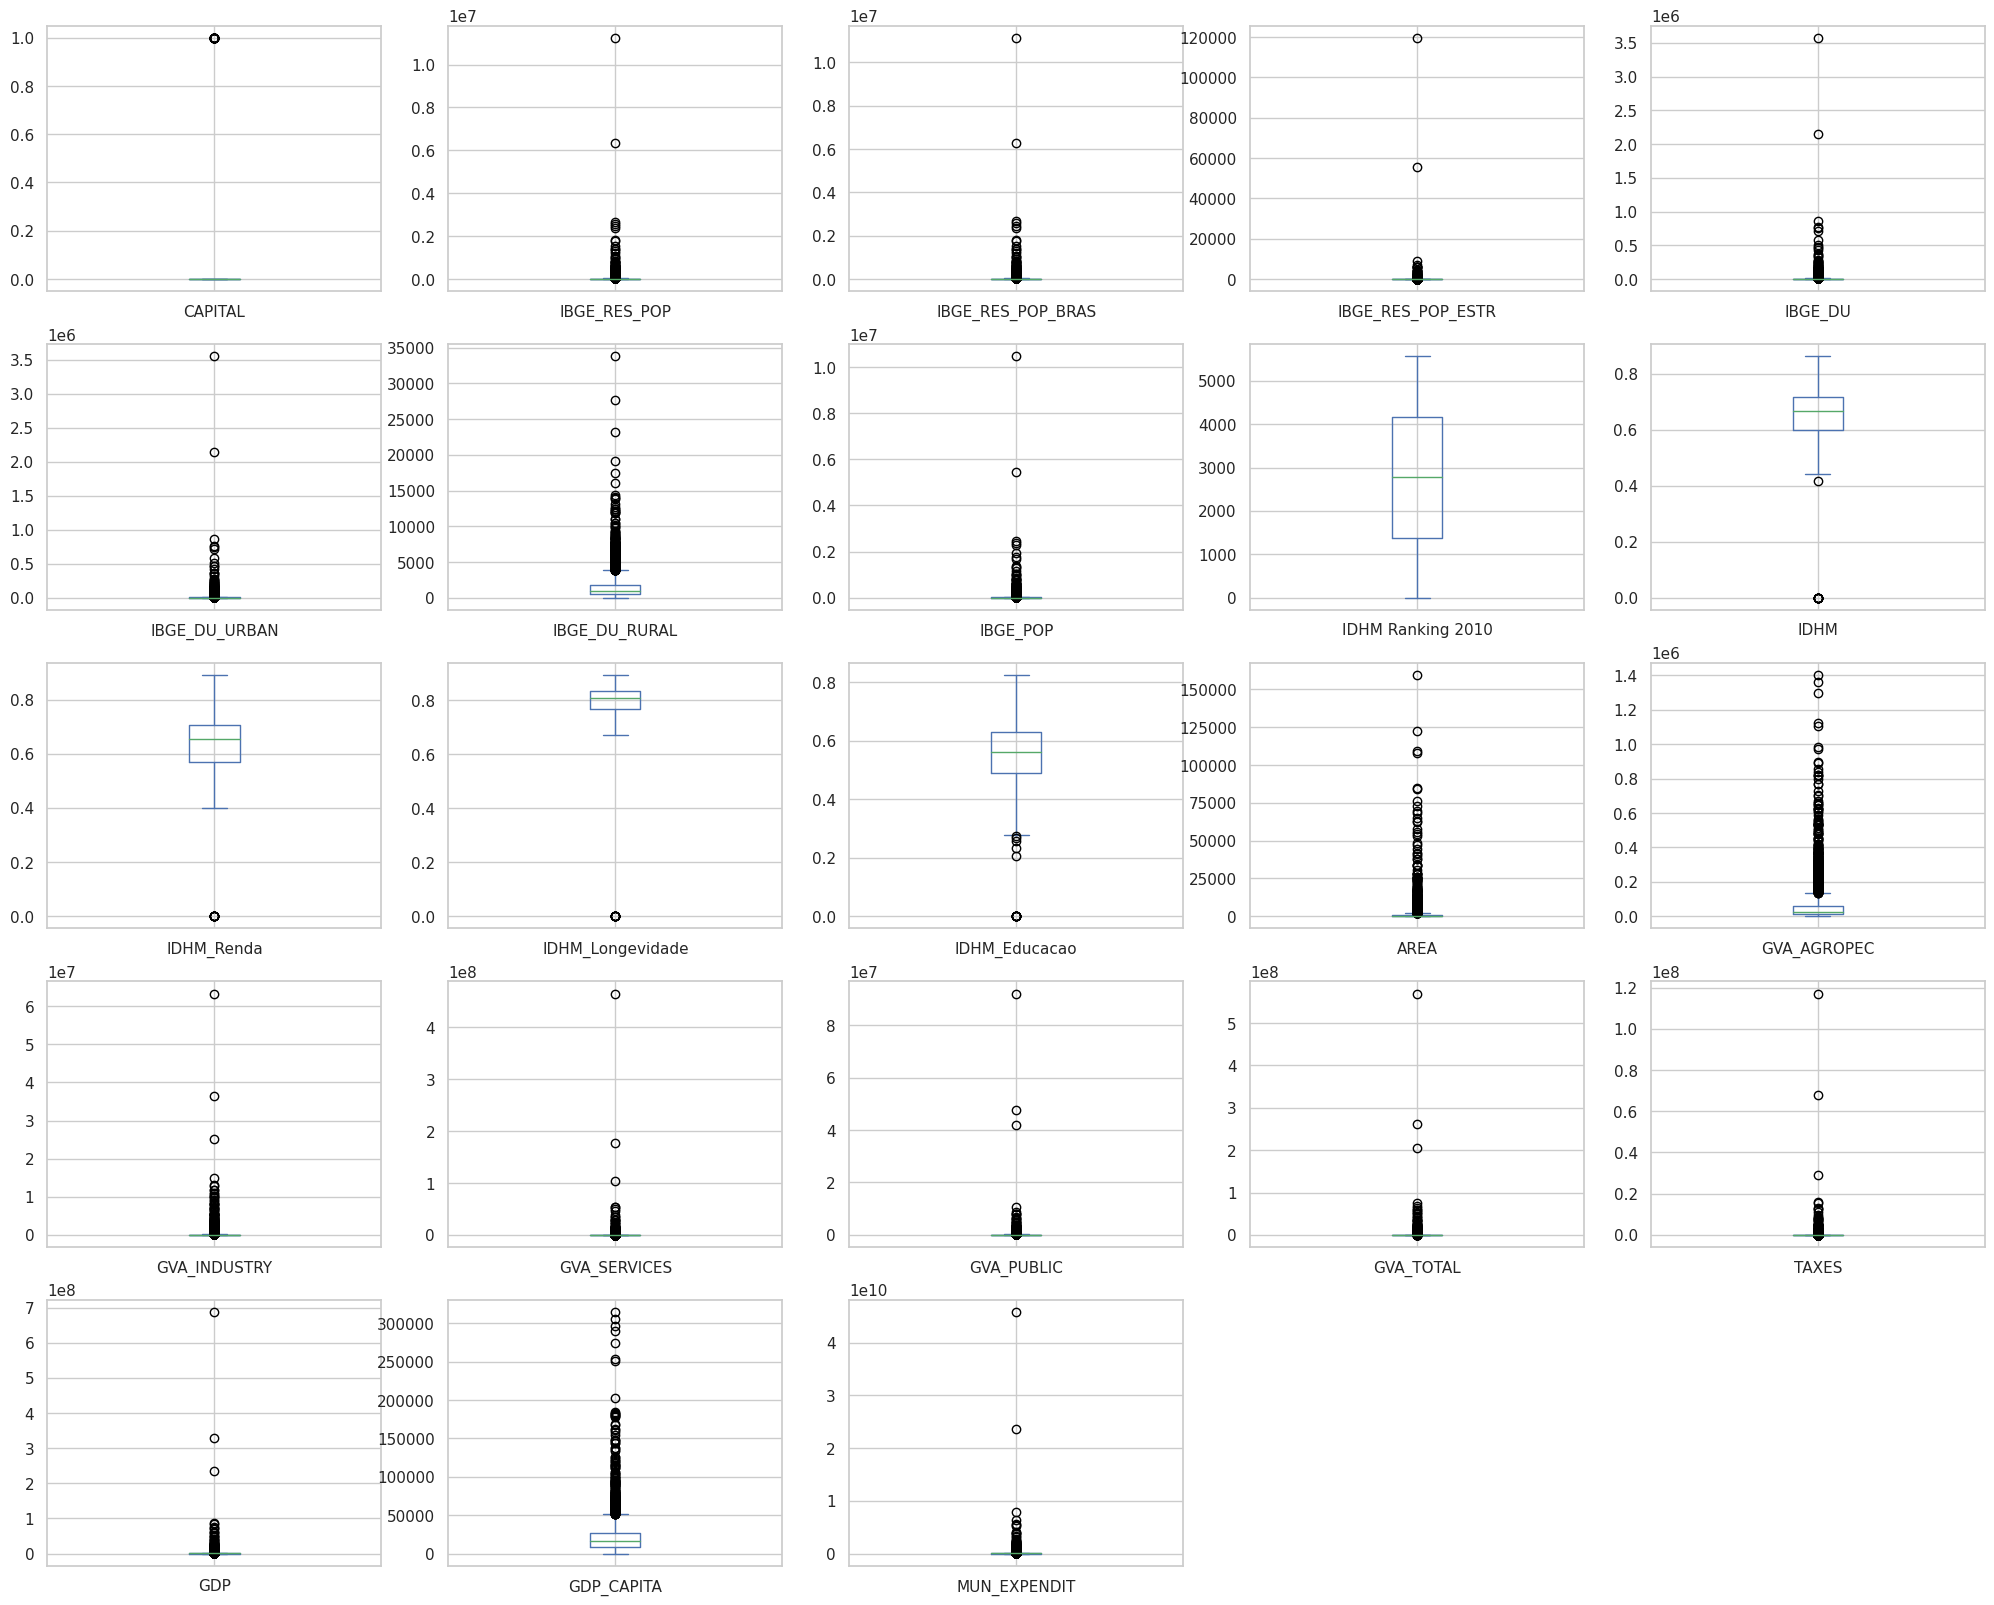

In [13]:
cidadesBR.plot(kind = 'box', subplots = True, layout = (5,5), sharex = False, sharey = False, figsize = (25,20))
plt.show()

Observando os boxplots acima, temos de maneira geral que muitas das variáveis, como IBGE_RES_POP, GDP, GVA_TOTAL, TAXES, GDP_CAPITA, entre outras, mostram uma grande assimetria, com a maioria dos valores concentrados em torno de um intervalo baixo e poucos valores muito altos, que são exibidos como outliers. Esses outliers estão presentes, principalmente, em variáveis relacionadas à população e PIB, podendo representar grandes capitais ou cidades economicamentes mais fortes que se destacam da maioria dos municípios.

A variável **CAPITAL** é binária, não há dispersão, apenas duas categorias distintas.

Olhando para as variáveis relacionadas à população (**BGE_RES_POP,IBGE_DU, IBGE_POP, IBGE_DU_URBAN**), vemos que elas mostram uma distribuição altamente assimétrica, com poucos municípios tendo populações extremamente altas, enquanto a maioria está concentrada em valores bem mais baixos. Ademais, a mediana está relativamente baixa, o que sugere que a maioria dos municípios é de pequeno porte.

Já para as variáveis de **IDHM** e seus componentes (**DHM_Renda, IDHM_Longevidade, IDHM_Educacao**), verificamos que há uma distribuição menos assimétrica em comparação com as variáveis populacionais, com a maioria dos valores distribuídos mais uniformemente. A variável **IDHM_Longevidade**, em especial, apresenta menos variabilidade, o que indica que a longevidade nos municípios não varia tanto quanto outras dimensões do IDHM.

A variável **AREA** também apresenta muitos outliers, indicando que alguns municípios têm áreas muito grandes em comparação com a maioria.

Finalmente, variáveis econômicas (**GDP, GVA_AGROPEC, GVA_SERVICES**), assim como as variáveis populacionais, apresentam distribuições altamente assimétricas e a presença de valores muito altos (outliers), que indicam que uma pequena fração dos municípios concentra a maior parte da atividade econômica.

Os boxplots ajudam a visusalizar a heterogeneidade entre os municípios analisados, com muitos valores extremos que indicam diferenças significativas entre pequenas cidades e grandes centros populacionais ou econômicos, ou seja, grandes capitais e centros econômicos se destacam de forma expressiva do restante dos municípios menores, especialmente nas variáveis relacionadas à economia e população.

- **Matriz de correlação**

Outra boa maneira de visualizar os atributos é verificando as suas correlações através da matriz de correlação.

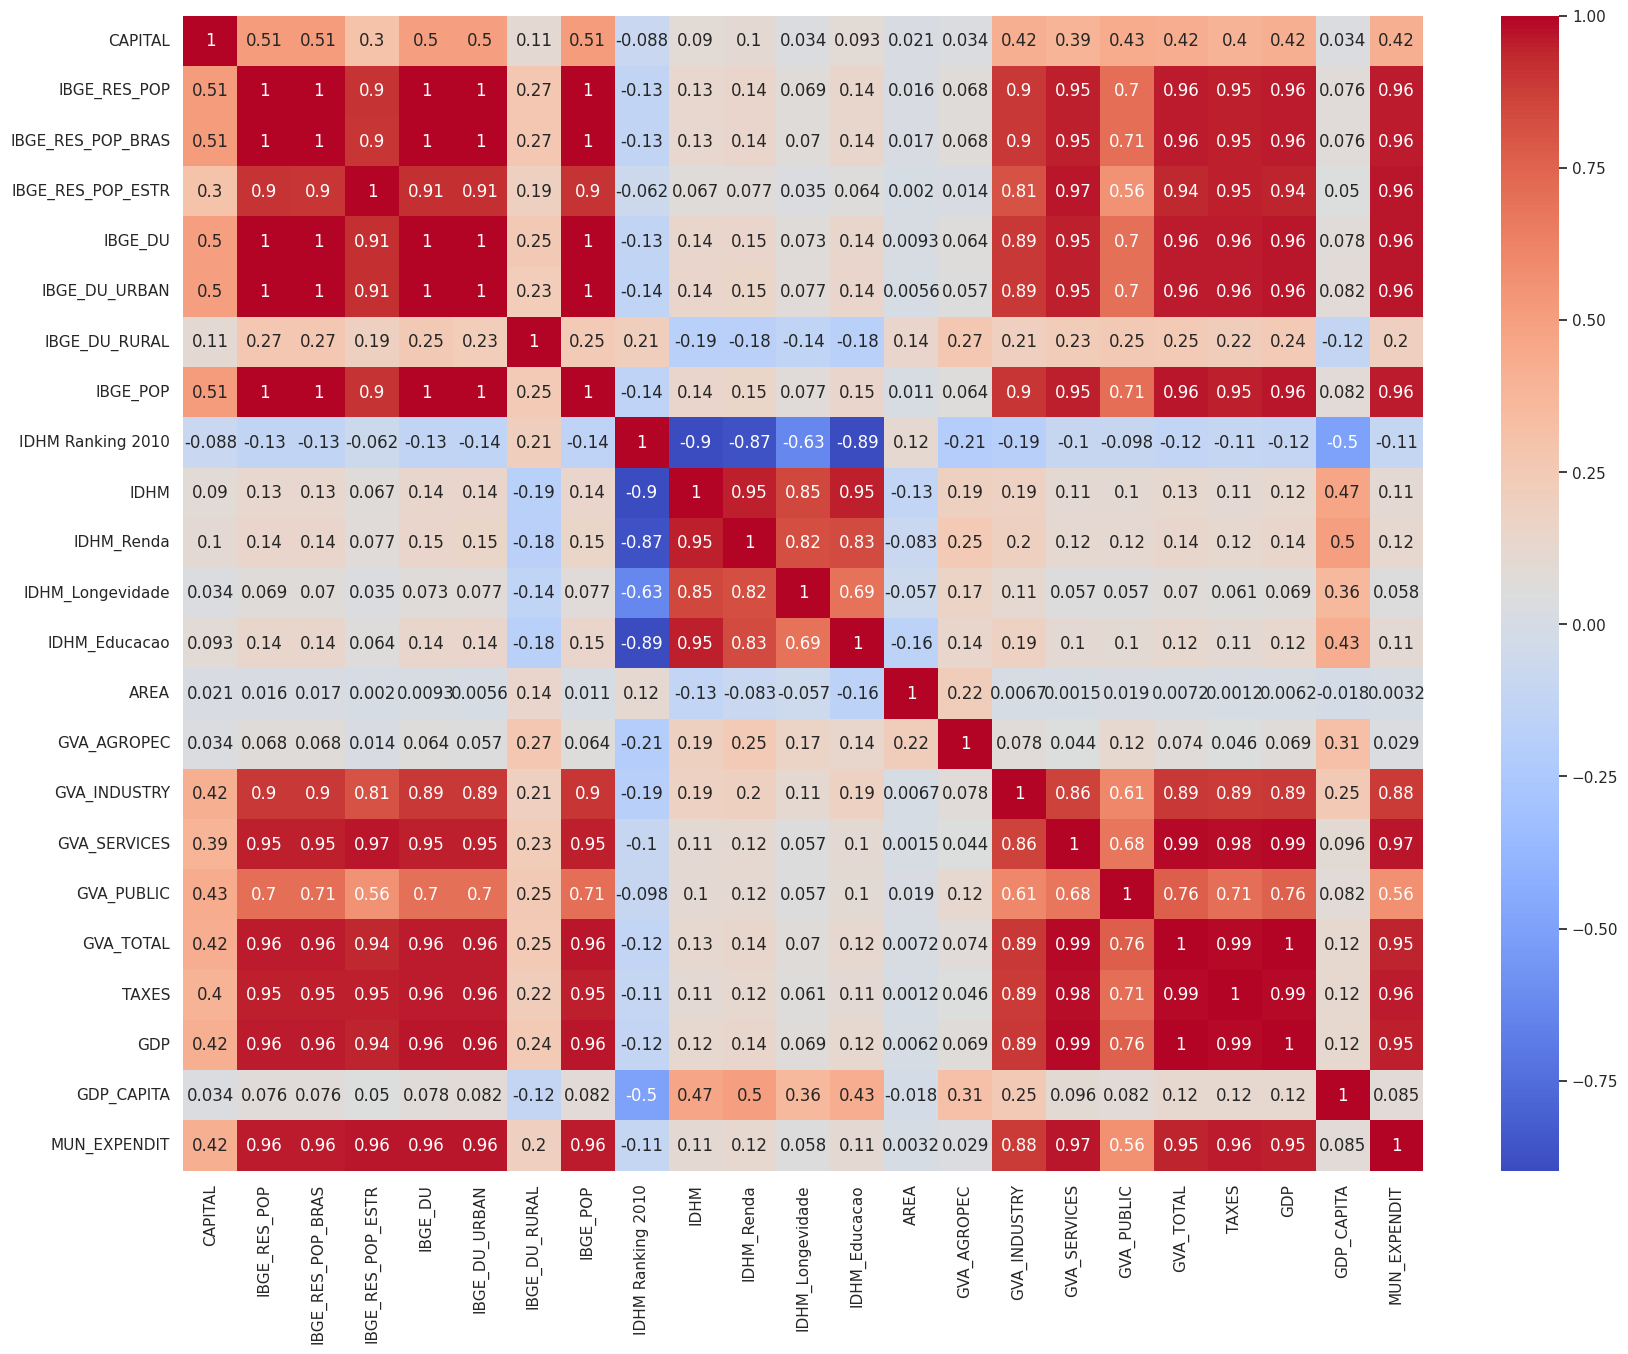

In [14]:
# Seleciona apenas as colunas numéricas (float e int)
numerical_cols = cidadesBR.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(20, 15))
# Matriz de Correlação com Matplotlib Seaborn
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm');
plt.show()

Na matriz acima, verificamos a chamada correlação de Pearson entre as variáveis. A escala de cores indica a força e a direção da correlação:

- **Vermelho** representa correlações positivas, onde valores maiores em uma variável estão associados a valores maiores na outra.

- **Azul** indica correlações negativas, onde um aumento em uma variável está relacionado a uma diminuição na outra.

- **Branco/cinza** denota uma correlação próxima de zero, ou seja, pouca ou nenhuma relação linear entre as variáveis.

Dito isso, verificamos que a matriz nos traz algumas informações relevantes a respeito da relação entre os atributos, são elas:

- **Correlação forte entre variáveis populacionais:** As variáveis relacionadas à população, como **IBGE_RES_POP, IBGE_RES_POP_BRAS, IBGE_RES_POP_ESTR, IBGE_DU, IBGE_DU_URBAN, e IBGE_POP** apresentam correlações muito fortes (entre 0.9 e 1), indicando que cidades com maior população geral também tendem a ter maiores populações urbanas, domicílios e outras características populacionais.

- **Desenvolvimento humano (IDHM) e economia:** O índice de desenvolvimento humano (IDHM) e suas subcomponentes, como **IDHM_Renda, IDHM_Longevidade e IDHM_Educacao**, estão fortemente correlacionados entre si, com correlações acima de 0.8. Ademais, a correlação dessas variáveis com variáveis econômicas, como **GDP** e **GDP_CAPITA**, também é alta (valores superiores a 0.7), sugerindo que cidades com maior PIB per capita tendem a ter melhor desenvolvimento humano.

- **Disparidades regionais e populacionais:** há correlação negativa entre variáveis relacionadas ao desenvolvimento humano (como **IDHM**) e variáveis relacionadas ao tamanho da população, como **IBGE_POP ou AREA**. Isso sugere que regiões mais populosas podem ter um IDH mais baixo, talvez devido a desigualdades de distribuição de riqueza ou desafios urbanos.

- **Setores da economia (GVA):** as variáveis **GVA_SERVICES, GVA_TOTAL, e GVA_PUBLIC** estão fortemente correlacionadas entre si, indicando que cidades com maior valor adicionado nos serviços tendem a ter maior contribuição total do valor agregado.

Além disso, podemos citar também outras observações:

- Cidades capitais (**CAPITAL = 1**) parecem ter correlações positivas moderadas com variáveis econômicas e de desenvolvimento humano.

- A relação entre o **GDP_CAPITA** e o **IDHM** é positiva (acima de 0.5), o que sugere uma relação direta entre riqueza per capita e desenvolvimento humano.

- Há uma correlação negativa significativa entre **IDHM_Educacao** e o ranking do IDH de 2010 (**IDHM_Ranking_2010**), o que é esperado, já que um menor valor no ranking (ou seja, uma posição melhor) deve estar associado a melhores índices de educação.

# Pré-processamento de dados

In [28]:
# Informação do tipo de cada variável
cidadesBR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5578 entries, 0 to 5577
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CITY               5578 non-null   object 
 1   STATE              5578 non-null   object 
 2   CAPITAL            5578 non-null   int64  
 3   IBGE_RES_POP       5578 non-null   int64  
 4   IBGE_RES_POP_BRAS  5578 non-null   int64  
 5   IBGE_RES_POP_ESTR  5578 non-null   int64  
 6   IBGE_DU            5578 non-null   int64  
 7   IBGE_DU_URBAN      5578 non-null   int64  
 8   IBGE_DU_RURAL      5578 non-null   int64  
 9   IBGE_POP           5578 non-null   int64  
 10  IDHM Ranking 2010  5578 non-null   int64  
 11  IDHM               5578 non-null   float64
 12  IDHM_Renda         5578 non-null   float64
 13  IDHM_Longevidade   5578 non-null   float64
 14  IDHM_Educacao      5578 non-null   float64
 15  AREA               5578 non-null   float64
 16  GVA_AGROPEC        5578 

Como as variáveis acima possuem escalas diferentes é essencial normalizar ou padronizar os dados. Isso impede que uma variável com uma escala muito maior influencie indevidamente o modelo de clusterização.

Existem duas maneiras para fazermos isso: usando **StandardScaler** ou **MinMaxScaler**. O StandardScaler transforma os dados de forma que eles tenham média zero e desvio padrão unitário (ou seja, uma distribuição normalizada). Já, o MinMaxScaler transforma os dados para que eles fiquem dentro de um intervalo específico, normalmente entre 0 e 1.

Dado que o dataframe possui muitos outliers e as distribuições parecem não ser uniformemente distribuídas (como visto nos boxplots), o StandardScaler é a melhor escolha. Ele vai centralizar os dados em torno de uma média zero e dar um tratamento melhor aos outliers, que não distorcerão tanto os valores normalizados. Isso será muito útilo para o uso dos algoritmos de clusterização como o **K-Means**.

In [16]:
# Variáveis de interesse
columns = ['GVA_AGROPEC', 'GVA_INDUSTRY', 'GVA_SERVICES', 'GVA_PUBLIC', 'GVA_TOTAL','TAXES', 'GDP', 'GDP_CAPITA', 'MUN_EXPENDIT']
data = cidadesBR[columns]

# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

Com os dados devidamente normalizados, devemos partir para a etapa de determinar o número ideal de clusters. Para isso, usaremos o chamado **Método do Cotovelo**, esse método calcula a soma dos quadrados das distâncias dos pontos aos seus centros de cluster e identifica o ponto onde a diminuição dessa soma começa a desacelerar.

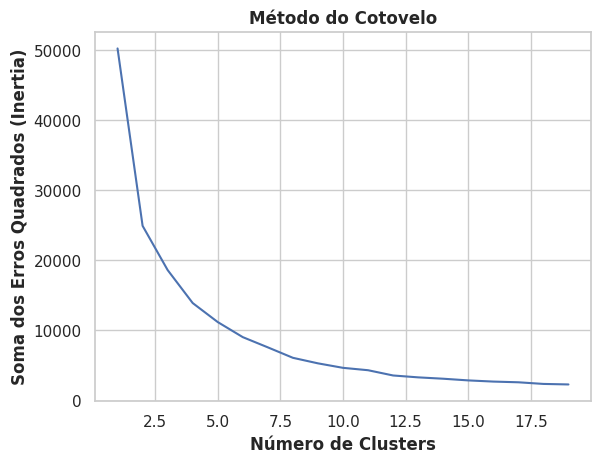

In [17]:
# Método do cotovelo
sse = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plotar o gráfico do cotovelo
plt.plot(range(1, 20), sse)
plt.xlabel('Número de Clusters', fontweight='bold')
plt.ylabel('Soma dos Erros Quadrados (Inertia)', fontweight='bold')
plt.title('Método do Cotovelo', fontweight='bold')
plt.show()

A soma dos quadrados ou inércia refere-se ao eixo Y. Quanto menor a inércia, melhor o ajuste dos clusters aos dados. O gráfico começa com uma inércia alta, ocorrendo muita variação dentro de cada cluster. À medida que o número de clusters aumenta, a inércia diminui porque os pontos estão sendo agrupados em conjuntos menores e mais homogêneos.

O cotovelo, ou seja, o ponto onde a diminuição da inércia se torna menos pronunciada, ocorre por volta de 5 a 6 clusters. Após esse ponto, adicionar mais clusters não resulta em uma melhora significativa na variabilidade explicada.

In [25]:
# Definir o número de clusters (você pode testar com diferentes valores)
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Ajustar o modelo aos dados
kmeans.fit(data_scaled)

# Adicionar os clusters ao dataframe original
cidadesBR['cluster'] = kmeans.labels_


Definido o número de 6 clusters, plotamos o gráfico referente aos clusters, fazendo uma relação entre o produto interno bruto per capita e as despesas municipais de cada cidade brasileira.

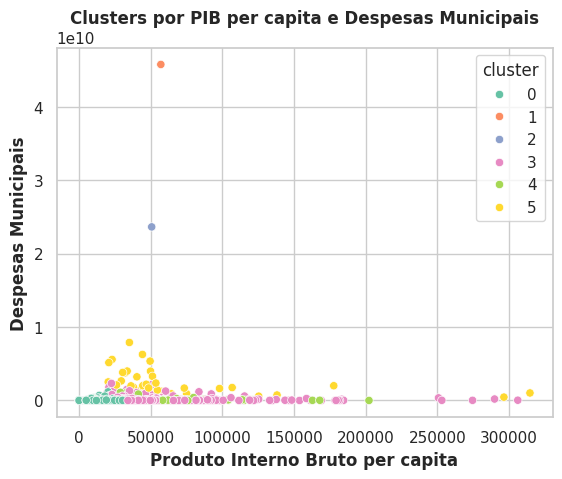

In [29]:
sns.scatterplot(x='GDP_CAPITA', y='MUN_EXPENDIT', hue='cluster', data=cidadesBR, palette='Set2', legend='full')
plt.title('Clusters por PIB per capita e Despesas Municipais', fontweight='bold')
plt.xlabel('Produto Interno Bruto per capita', fontweight='bold')
plt.ylabel('Despesas Municipais', fontweight='bold')
plt.show()

# Avaliação de Resultados

In [27]:
# Obter uma amostra de uma cidade de cada cluster
for i in range(n_clusters):
    # Filtrar cidades do cluster i
    exemplo_cidade = cidadesBR[cidadesBR['cluster'] == i].sample(1)
    cidade_nome = exemplo_cidade['CITY'].values[0]
    estado = exemplo_cidade['STATE'].values[0]
    print(f'Exemplo do Cluster {i}: {cidade_nome} - {estado}')


Exemplo do Cluster 0: Miravânia - MG
Exemplo do Cluster 1: São Paulo - SP
Exemplo do Cluster 2: Brasília - DF
Exemplo do Cluster 3: Camapuã - MS
Exemplo do Cluster 4: Luís Eduardo Magalhães - BA
Exemplo do Cluster 5: Jundiaí - SP


Agora, analisamos os resultados de três modelos diferentes a partir das métricas: a **acurácia**, o **f1-score**, a **precisão**, a **matriz de confusão** e **área sob a curva ROC (AUC-ROC)**.

A acurácia é uma métrica simples que mede a proporção de previsões corretas feitas pelo modelo. Matematicamente, a acurácia é calculada como o número de previsões corretas dividido pelo número total de previsões. Ela é útil quando as classes estão balanceadas no conjunto de dados. Entretanto, uma acurácia alta pode ser enganosa, visto que a mesma pode ser obtida simplesmente prevendo a classe majoritária em todas as instâncias.

O F1-score é uma métrica que combina precisão e recall em um único número. É a média harmônica dessas duas métricas. A precisão mede a proporção de instâncias classificadas como positivas que são realmente positivas. O recall, por outro lado, mede a proporção de instâncias positivas que foram corretamente identificadas pelo modelo. Ele é útil quando há um desequilíbrio entre as classes no conjunto de dados, pois leva em consideração tanto os falsos positivos quanto os falsos negativos.

A precisão é a proporção de instâncias positivas previstas corretamente em relação ao total de instâncias positivas previstas pelo modelo. Ela é útil quando o foco está em minimizar os falsos positivos, ou seja, quando é importante garantir que as instâncias classificadas como positivas sejam realmente positivas.


A matriz de confusão, é uma tabela que mostra as frequências de classificação corretas e incorretas feitas pelo modelo para cada classe. Ela fornece informações detalhadas sobre como o modelo está performando para cada classe individualmente, incluindo falsos positivos, falsos negativos, verdadeiros positivos e verdadeiros negativos.

Já, a AUC-ROC é uma medida da capacidade do modelo de distinguir entre classes. Quanto maior a AUC-ROC, melhor o modelo está em separar as classes. É uma métrica útil quando o conjunto de dados está desbalanceado.



1.   VotingClassifier sem transformação de dados



In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo -> VOTING
model = VotingClassifier(bases)
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.994128009395185


F1-Score: 0.7368421052631579


Precisão: 0.875


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
8 falsos negativos, 14 verdadeiros positivos


AUC-ROC: 0.8175869341841977




2.   K-Nearest Neighbors sem transformação de dados



In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo -> KNN
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.9911920140927775


F1-Score: 0.5454545454545455


Precisão: 0.8181818181818182


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
13 falsos negativos, 9 verdadeiros positivos


AUC-ROC: 0.703950570547834


3.   Regressão Logística com dataset padronizado



In [ ]:
# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print("Acurácia:", accuracy_score(y_test, predictions))
print("\n")

# Calculando o F1-Score
f1 = f1_score(y_test, predictions)

print("F1-Score:", f1)
print("\n")

# Estimando a precisão
precision = precision_score(y_test, predictions)
print("Precisão:", precision)
print("\n")


# Estimando a matriz de confusão
cm = confusion_matrix(y_test, predictions)

vp = cm[1, 1]
fn = cm[1, 0]
fp = cm[0, 1]
vn = cm[0, 0]


print("Matriz de Confusão:")
print(f"{vn} verdadeiros negativos, {fp} falsos positivos")
print(f"{fn} falsos negativos, {vp} verdadeiros positivos")
print("\n")

# Estimando a AUC-ROC
auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

Acurácia: 0.992953611274222


F1-Score: 0.6666666666666665


Precisão: 0.8571428571428571


Matriz de Confusão:
1679 verdadeiros negativos, 2 falsos positivos
10 falsos negativos, 12 verdadeiros positivos


AUC-ROC: 0.7721323887296523


Após a análise dos 3 tipos diferentes de modelo, vimos que a melhor opção é a de VotingClassifier, sem a necessidade de transformação de dados.

**Conclusão**

Um resultado com uma acurácia de 0,994, um F1-score de 0,737, uma precisão de 0,875, uma AUC-ROC de 0,818 e uma matriz de confusão de [[1679, 2], [8, 14]] indica um desempenho geral muito bom do modelo de classificação.

A acurácia com esse valor indica que a grande maioria das previsões feitas pelo modelo estão corretas. Uma pontuação de F1-score de 0,737 é bastante alta e indica um bom equilíbrio entre precisão e recall no modelo. A precisão, também alta, mostra que o modelo está fazendo um bom trabalho em minimizar os falsos positivos. O valor de 0,818 de AUC-ROC é um desempenho bem decente, mostrando que o modelo está conseguindo separar as classes positivas e negativas. Por último, a matriz de confusão nos informa que o modelo errou muito pouco em suas classificações.

Em resumo, o resultado apresentado mostra um desempenho promissor, indicando um modelo bem calibrado e eficaz na classificação das instâncias do conjunto de dados, com um baixo número de erros, um bom equilíbrio entre precisão e recall e uma capacidade robusta de generalização. Além disso, não foi observado nenhum problema tanto de underfitting, quanto de overfitting, visto que o modelo não teve um desempenho muito melhor nos dados de treinamento do que nos dados de teste -típico do overfitting-, nem teve um desempenho ruim tanto nos dados de treinamento quanto nos dados de teste -que caracterizam o underfitting-. No entanto, é essencial continuar refinando e validando esses modelos à medida que novos dados se tornam disponíveis e o contexto do problem evolui, ou seja, será que a régua para ser hall da fama continuará sendo a mesma pelos próximos 10, 20 ou 30 anos?